In [ ]:
"""
from pathlib import Path
import sys
# Agregar el path del directorio "code"
code_path = Path("../code").resolve()
if str(code_path) not in sys.path:
    sys.path.insert(0, str(code_path))
"""

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.dates as mdates
#from utils import get_channel
#from CustomTransformers import TimeSeriesFreqRegularization
#from utils import rolling_forecast
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("../datasets/ETH-USD_Open.csv", parse_dates=True, index_col="Datetime")
#df = df.asfreq("D")

In [17]:
df["Price"] = df["Open"]
df.drop(columns=["Open"], inplace=True)

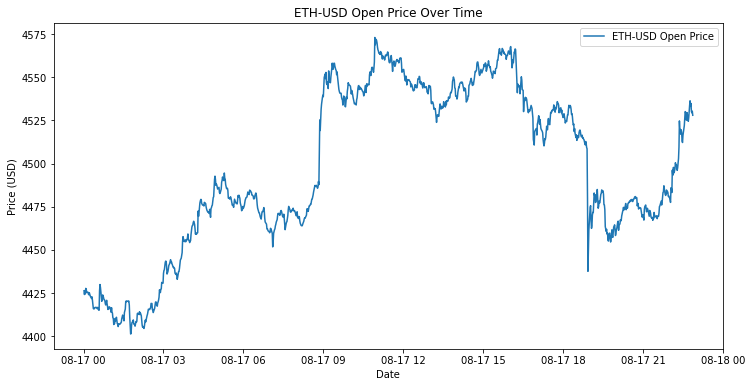

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='ETH-USD Open Price')
plt.title('ETH-USD Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Ver valores ¿Es estacionaria?

In [20]:
ADF_result = adfuller(df["Price"])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.6951524852295587
p-value: 0.43361177714170085


No rechazamos la hipótesis nula de que la serie tiene una raíz unitaria y por tanto no es estacionaria. Debemos obtener la diferencia de primer orden. 

In [21]:
df.loc[:,['values_diff']] = df["Price"].diff()
df_diff1 = df.copy()
#Eliminamos el nulo del inicio
df_diff1.dropna(inplace=True)

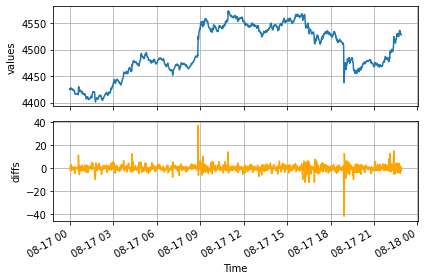

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df["Price"])
ax1.set_xlabel('Time')
ax1.set_ylabel('values')
#ax1.axvspan(450, 500, color='#808080', alpha=0.2)
ax1.grid()
ax2.plot(df['values_diff'], color='orange')
ax2.set_xlabel('Time')
ax2.set_ylabel('diffs')
ax2.grid()
#ax2.axvspan(449, 498, color='#808080', alpha=0.2)


fig.autofmt_xdate()
plt.tight_layout()

plt.show()

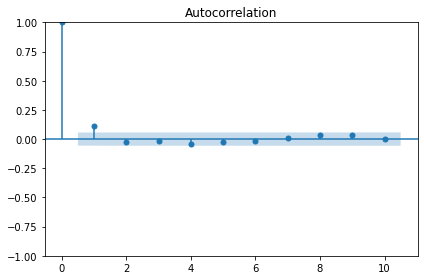

In [23]:
#El primer elemento es NaN, por eso no lo consideramos
plot_acf(df_diff1["values_diff"], lags=10)
plt.tight_layout()
plt.show()


¿Moving average de 1?